In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
url = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"
iris = pd.read_csv(url)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
iris.shape

(150, 5)

In [9]:
iris.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [11]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: xlabel='species', ylabel='petal_width'>

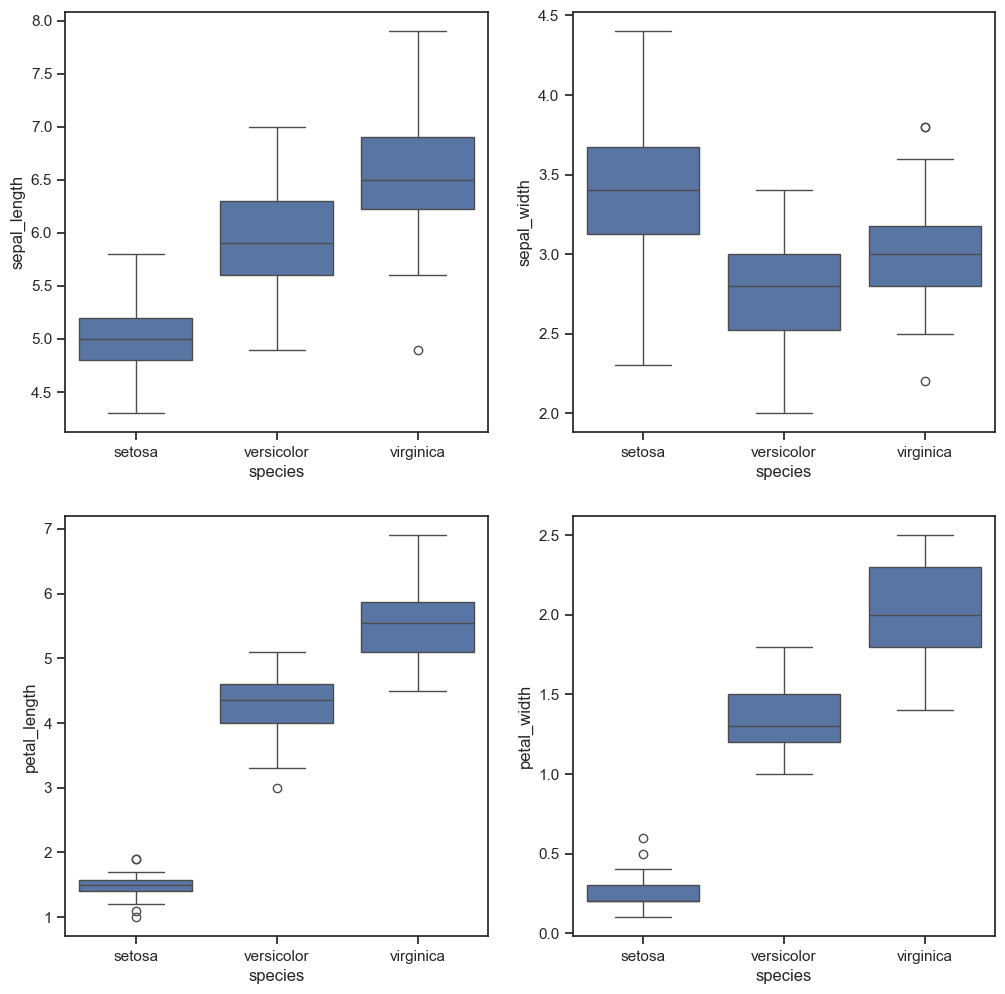

In [33]:
sns.set(style="ticks")
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
sns.boxplot(x='species', y='sepal_length', data=iris)
plt.subplot(2, 2, 2)
sns.boxplot(x='species', y='sepal_width', data=iris)
plt.subplot(2, 2, 3)
sns.boxplot(x='species', y='petal_length', data=iris)
plt.subplot(2, 2, 4)
sns.boxplot(x='species', y='petal_width', data=iris)

In [21]:
X = iris.drop(columns=['species'])
Y = iris.species

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_val)

array([[ 0.35451684, -0.57925837,  0.5576453 ,  0.02332414],
       [-0.13307079,  1.67028869, -1.16259727, -1.17620281],
       [ 2.30486738, -1.02916778,  1.81915651,  1.48941263],
       [ 0.23261993, -0.35430366,  0.44296246,  0.42316645],
       [ 1.2077952 , -0.57925837,  0.61498672,  0.28988568],
       [-0.49876152,  0.77046987, -1.27728011, -1.04292204],
       [-0.2549677 , -0.35430366, -0.07311031,  0.15660491],
       [ 1.32969211,  0.09560575,  0.78701097,  1.48941263],
       [ 0.47641375, -1.9289866 ,  0.44296246,  0.42316645],
       [-0.01117388, -0.80421307,  0.09891395,  0.02332414],
       [ 0.84210448,  0.32056046,  0.78701097,  1.08957031],
       [-1.23014297, -0.12934896, -1.33462153, -1.44276436],
       [-0.37686461,  0.99542457, -1.39196294, -1.30948358],
       [-1.10824606,  0.09560575, -1.27728011, -1.44276436],
       [-0.86445224,  1.67028869, -1.27728011, -1.17620281],
       [ 0.59831066,  0.54551516,  0.5576453 ,  0.55644722],
       [ 0.84210448, -0.

In [47]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [48]:
y_pred = classifier.predict(X_val)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_val, y_pred)
print("Classification Report:")
print(result1)
result2 = accuracy_score(y_val, y_pred)
print("Accuracy Score:", result2)

Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

Accuracy Score: 0.9666666666666667


In [ ]:
from sklearn import neighbors
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score
f1_list = []
k_list = []
for k in range(1, 10):
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_val)
    f = f1_score(y_val, pred, average='micro')
    f1_list.append(f)
    k_list.append(k)

Text(0, 0.5, 'f1 score')

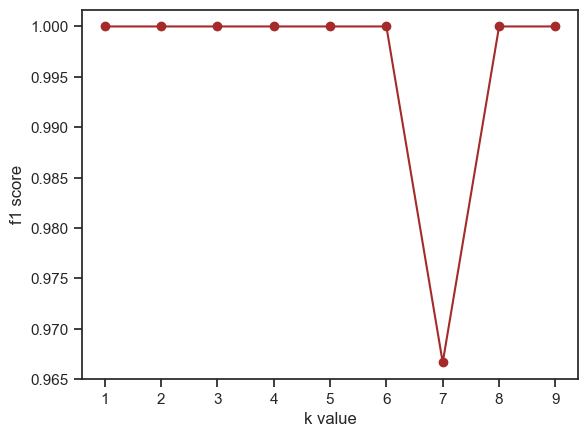

In [55]:
plt.figure()
plt.plot(k_list, f1_list, marker='o', color='brown')
plt.xlabel('k value')
plt.ylabel('f1 score')